In [2]:
# Notebook for code development for vehicle stock module (vsm)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# INPUT DATA

In [3]:
# Temporarily store pkm_by_mode data here to be used
# Fixed data. Can replace by what Tang gives us.
def return_input_data(): # Fixed data (can replace by what Tang gives us)
    # === PASSENGER TRANSPORT (passenger-kilometres, million pkm) ===
    pkm_by_mode = {
        2018: {'BUS': 8281.15, 'CAR': 3011.33, 'MOTO': 1505.66,
               'WALK': 800, 'BIKE': 400, 'TRAIN': 2500, 'PLANE': 12000},
        2019: {'BUS': 8605.21, 'CAR': 3129.17, 'MOTO': 1564.58,
               'WALK': 820, 'BIKE': 420, 'TRAIN': 2600, 'PLANE': 12500},
        2020: {'BUS': 10027.35, 'CAR': 3646.31, 'MOTO': 1823.16,
               'WALK': 850, 'BIKE': 460, 'TRAIN': 2700, 'PLANE': 11000},  # pandemic dip
        2021: {'BUS': 11678.98, 'CAR': 4246.90, 'MOTO': 2123.45,
               'WALK': 870, 'BIKE': 500, 'TRAIN': 2900, 'PLANE': 13000},
        2022: {'BUS': 11492.00, 'CAR': 4178.91, 'MOTO': 2089.45,
               'WALK': 890, 'BIKE': 520, 'TRAIN': 3100, 'PLANE': 13500},
        2023: {'BUS': 12965.71, 'CAR': 4714.80, 'MOTO': 2357.40,
               'WALK': 910, 'BIKE': 550, 'TRAIN': 3400, 'PLANE': 14000},
        2024: {'BUS': 14571.56, 'CAR': 5298.75, 'MOTO': 2649.37,
               'WALK': 930, 'BIKE': 580, 'TRAIN': 3700, 'PLANE': 14500},
        2025: {'BUS': 16397.29, 'CAR': 5962.65, 'MOTO': 2981.32,
               'WALK': 950, 'BIKE': 610, 'TRAIN': 4000, 'PLANE': 15000},
        2026: {'BUS': 18357.96, 'CAR': 6675.62, 'MOTO': 3337.81,
               'WALK': 970, 'BIKE': 640, 'TRAIN': 4300, 'PLANE': 15600},
        2027: {'BUS': 20533.13, 'CAR': 7466.59, 'MOTO': 3733.30,
               'WALK': 990, 'BIKE': 670, 'TRAIN': 4600, 'PLANE': 16200},
        2028: {'BUS': 22984.39, 'CAR': 8357.96, 'MOTO': 4178.98,
               'WALK': 1010, 'BIKE': 700, 'TRAIN': 4900, 'PLANE': 16800},
        2029: {'BUS': 25706.56, 'CAR': 9347.84, 'MOTO': 4673.92,
               'WALK': 1030, 'BIKE': 730, 'TRAIN': 5200, 'PLANE': 17500},
        2030: {'BUS': 27706.56, 'CAR': 12047.84, 'MOTO': 6673.92,
               'WALK': 1050, 'BIKE': 760, 'TRAIN': 5500, 'PLANE': 18000}
    }

    # === FREIGHT TRANSPORT (tonne-kilometres, million tkm) ===
    tkm_by_mode = {
        2018: {'TRUCK': 200000, 'RAIL_FREIGHT': 60000, 'SHIP': 400000, 'AIR_FREIGHT': 1500},
        2019: {'TRUCK': 210000, 'RAIL_FREIGHT': 62000, 'SHIP': 410000, 'AIR_FREIGHT': 1600},
        2020: {'TRUCK': 190000, 'RAIL_FREIGHT': 58000, 'SHIP': 390000, 'AIR_FREIGHT': 1200},
        2021: {'TRUCK': 220000, 'RAIL_FREIGHT': 64000, 'SHIP': 420000, 'AIR_FREIGHT': 1700},
        2022: {'TRUCK': 225000, 'RAIL_FREIGHT': 66000, 'SHIP': 430000, 'AIR_FREIGHT': 1800},
        2023: {'TRUCK': 235000, 'RAIL_FREIGHT': 68000, 'SHIP': 440000, 'AIR_FREIGHT': 1900},
        2024: {'TRUCK': 245000, 'RAIL_FREIGHT': 70000, 'SHIP': 450000, 'AIR_FREIGHT': 2000},
        2025: {'TRUCK': 255000, 'RAIL_FREIGHT': 72000, 'SHIP': 460000, 'AIR_FREIGHT': 2100},
        2026: {'TRUCK': 265000, 'RAIL_FREIGHT': 74000, 'SHIP': 470000, 'AIR_FREIGHT': 2200},
        2027: {'TRUCK': 275000, 'RAIL_FREIGHT': 76000, 'SHIP': 480000, 'AIR_FREIGHT': 2300},
        2028: {'TRUCK': 285000, 'RAIL_FREIGHT': 78000, 'SHIP': 490000, 'AIR_FREIGHT': 2400},
        2029: {'TRUCK': 295000, 'RAIL_FREIGHT': 80000, 'SHIP': 500000, 'AIR_FREIGHT': 2500},
        2030: {'TRUCK': 310000, 'RAIL_FREIGHT': 82000, 'SHIP': 510000, 'AIR_FREIGHT': 2600}
    }

    # === OCCUPANCY / LOAD FACTORS ===
    occ_by_mode = {
        year: {
            # Passenger modes (passengers per vehicle)
            'BUS': 15,
            'CAR': 2,
            'MOTO': 1.5,
            'WALK': 1,
            'BIKE': 1,
            'TRAIN': 200,
            'PLANE': 150,
            # Freight modes (tonnes per vehicle)
            'TRUCK': 10,
            'RAIL_FREIGHT': 1000,
            'SHIP': 20000,
            'AIR_FREIGHT': 50
        }
        for year in range(2018, 2031)
    }

    # === AVERAGE ANNUAL KILOMETRAGE ===
    kilometrage_by_mode = {
        year: {
            'BUS': 31986,
            'CAR': 23023,
            'MOTO': 17807,
            'WALK': 3000,
            'BIKE': 1500,
            'TRAIN': 180000,
            'PLANE': 7000000,
            'TRUCK': 80000,
            'RAIL_FREIGHT': 100000,
            'SHIP': 600000,
            'AIR_FREIGHT': 3500000
        }
        for year in range(2018, 2031)
    }

    return pkm_by_mode, tkm_by_mode, occ_by_mode, kilometrage_by_mode

In [4]:
# return age data - EXISTING STOCK (based on GIZ INFRAS 2019 Kenya data)
def return_age_data_cumulative_stock():
    age_data = pd.read_excel('./../data/vehicle_stock/age_distribution.xlsx')
    return age_data

In [5]:
# return age data - NEW STOCK (based on Zambian vehicle registration data (Malindi))
def return_age_data_new_stock():
    new_age_data = pd.read_excel('./../data/vehicle_stock/age_distribution_new_vehicles.xlsx')
    return new_age_data

In [6]:
# return scrappage data - commented out, as replaced with Weibull parameter version
# def return_scrappage_data():
#     scrappage_data = pd.read_excel('./../data/vehicle_stock/scrappage_rates.xlsx')
#     return scrappage_data

# CALCULATE BASE YEAR STOCK

In [7]:
def get_base_year_stock(df, base_year, age_data=return_age_data_cumulative_stock(), vehicles=['BUS', 'CAR', 'MOTO']):#, 'MINIBUS', 'VAN', 'TRUCK']):
    """Retrieves vehicle stock by mode for the base year (input data).

    Args:
        df: Country data. Currently built on country-specific data.
        base_year: Integer. E.g. 2015.

    Returns:
        Dict with year as key and nested dict of mode:vehicles as value.
    """

    # Retrieve data from stock
    base_year_stock = {base_year: {vehicle: {} for vehicle in vehicles}}
    for vehicle in vehicles:
        for age in age_data.Age.unique().tolist():
            base_year_stock[base_year][vehicle][age] = np.round(df[df['Data code'] == f'ROAD_STOCK_CUM_{vehicle}'][base_year].item() * age_data[age_data['Age'] == age][[c for c in age_data.columns.tolist() if 'CAR' in c][0]].tolist()[0], 0) # TODO: this just takes the first matching age data. Improve with a better tech lookup.

    return base_year_stock

In [8]:
# Scrappage data
def generate_scrappage_curves(max_age=30):
    """
    Generate scrappage rates (age-specific) for various modes, calibrated
    to Kenyan-like lifetimes.
    Returns DataFrame indexed by age, columns = modes, where values are
    scrappage rate from age → age+1.
    """
    # Kenya-calibrated parameters (Weibull survival)
    params = {
        'CAR':     {'eta': 14, 'beta': 3.0},
        'MOTO':    {'eta': 9,  'beta': 2.5},
        'BUS':     {'eta': 12, 'beta': 3.5},
        'TRUCK':   {'eta': 10, 'beta': 3.2},
        'TRAIN':   {'eta': 25, 'beta': 3.5},
        'PLANE':   {'eta': 25, 'beta': 3.0},
        'SHIP':    {'eta': 30, 'beta': 3.5}
    }

    ages = np.arange(0, max_age + 1)
    scrappage = pd.DataFrame(index=ages, columns=params.keys(), dtype=float)

    for mode, p in params.items():
        S = np.exp(- (ages / p['eta']) ** p['beta'])
        # Scrappage rate: proportion that exit between a and a+1
        # i.e. 1 - S(a+1)/S(a)
        # For final age, assume full scrappage
        rates = 1 - (S[1:] / S[:-1])
        # Append rate = 1 for last age (everything scrapped)
        rates = np.append(rates, 1.0)
        scrappage[mode] = rates

    return scrappage

In [9]:
def get_base_year_new_stock(df, base_year, age_data=return_age_data_new_stock(), vehicles=['BUS', 'CAR', 'MOTO']):#, 'MINIBUS', 'VAN', 'TRUCK']):
    """Retrieves new vehicle stock by mode for the base year (input data).

    Args:
        df: Country data. Currently built on country-specific data.
        base_year: Integer. E.g. 2015.

    Returns:
        Dict with year as key and nested dict of mode:vehicles as value.
    """

    # Retrieve data from stock
    base_year_new_stock = {base_year: {vehicle: {} for vehicle in vehicles}}
    for vehicle in vehicles:
        for age in age_data['age'].unique().tolist():
            base_year_new_stock[base_year][vehicle][age] = np.round(df[df['Data code'] == f'ROAD_STOCK_NEW_{vehicle}'][base_year].item() * age_data[age_data['age'] == age][f'{vehicle}_{base_year}'].item(), 0) 
    
    return base_year_new_stock

# RETURN COUNTRY DATA

In [10]:
def return_country_data(country, start_year=1990, end_year=2022):
    try:
        df = pd.read_excel(f"./../data/country_data/{country}/{country}.xlsx")
        country_data = df[['Country name', 'Variable', 'Type','Sub-type', 'Fuel', 'Destination', 'Data code', 'Unit'] + [y for y in range(
            start_year, end_year)]]
        return country_data
    except Exception as e:
        return f"an error occurred: {e}"

# CALCULATE DESIRED STOCK

In [11]:
# function to return desired vehicle fleet based on demand. Using basic formula vehicle_fleet = PKM / (occupancy * kilometrage)
def calculate_desired_stock(pkm_by_mode, occ_by_mode, kilometrage_by_mode):
    """Calculates the desired vehicle fleet for each mode based on PKM, occupancy, and annual kilometrage.

    Args:
        pkm_by_mode (dict): A dictionary containing PKM values for each mode and year.
        occ_by_mode (dict): A dictionary containing average occupancy values for each mode and year.
        kilometrage_by_mode (dict): A dictionary containing average annual kilometrage values for each mode and year.

    Returns:
        dict: A dictionary containing the desired vehicle fleet for each mode and year.
    """

    desired_stock = {}

    for year, pkm_data in pkm_by_mode.items():
        desired_stock[year] = {}
        for mode, pkm in pkm_data.items():
            occupancy = occ_by_mode[year][mode]
            kilometrage = kilometrage_by_mode[year][mode]
            desired_stock[year][mode] = 1e6 * pkm / (occupancy * kilometrage)  # pkm in million km

    return desired_stock

# CALCULATE ANNUAL VEHICLE STOCKS

In [12]:
# end_year = 2030
#
# def calculate_vehicle_stocks(desired_stock, base_year_stock, base_year_new_stock, age_data_new_stock, scrappage_data, base_year=2018, end_year=2030, vehicles=['BUS', 'CAR', 'MOTO']):
#
#     # vehicles=['BUS', 'CAR', 'MOTO']# , 'MINIBUS', 'VAN', 'TRUCK']
#     scrappage_lookup = {'BUS':'BUS', 'CAR':'CAR', 'MOTO':'MOTO', 'MINIBUS':'LCV', 'VAN':'LCV', 'TRUCK':'HGV'}
#
#     # instantiate dictionaries to track stock and scrap annually
#     annual_stock = {base_year: base_year_stock[base_year]}  # (cumulative)
#     annual_scrap = {year: {vehicle: {} for vehicle in vehicles} for year in range(base_year, end_year+1)}  # (scrap in that year)
#     new_stock = {base_year: base_year_new_stock[base_year]}  # (new stock, can be second-hand: accounting for age profile
#
#     # calculate the latest year available in the new stock age data
#     latest_year = max([int(c.split('_')[-1]) for c in age_data_new_stock.columns.tolist() if '20' in c])
#
#     for year in range(base_year+1, end_year+1):
#
#         annual_stock[year] = {}
#         annual_scrap[year] = {}
#         new_stock[year] = {}
#
#         for vehicle in vehicles:
#
#             annual_stock[year][vehicle] = {}
#             annual_scrap[year][vehicle] = {}
#             new_stock[year][vehicle] = {}
#
#             for age in range(len(annual_stock[year-1][vehicle])-1):
#
#                 # calculate scrap in year y-1 based on the stock in y-1 and the scrappage probabilities (that are independent of time)
#                 annual_scrap[year-1][vehicle][age] = annual_stock[year-1][vehicle][age] * scrappage_data[scrappage_data['Age'] == age][scrappage_lookup[vehicle]].item()
#
#                 # calculate stock in year y (before the addition of new vehicles) by subtracting scrap (y-1) from stock (y-1)
#                 annual_stock[year][vehicle][age] = annual_stock[year-1][vehicle][age] - annual_scrap[year-1][vehicle][age]  # remove scrapped vehicles from the stock
#
#             # calculate new stock required: new stock required = desired stock[y] - actual stock[y-1] + scrap[y-1]
#             new_stock_required = desired_stock[year][vehicle] - sum(annual_stock[year-1][vehicle].values()) + sum(annual_scrap[year-1][vehicle].values())
#
#             # if less than zero, return zero.
#             if new_stock_required <= 0:
#                 new_stock_required = 0
#
#             # calculate age distribution of additional stock
#             for age in range(len(annual_stock[year-1][vehicle])-1):
#
#                 if f'{vehicle}_{year}' in age_data_new_stock.columns:
#                     new_stock[year][vehicle][age] = new_stock_required * age_data_new_stock[age_data_new_stock['age'] == age][f'{vehicle}_{year}'].item()
#
#                 else:
#                     new_stock[year][vehicle][age] = new_stock_required * age_data_new_stock[age_data_new_stock['age'] == age][f'{vehicle}_{latest_year}'].item()
#
#                 annual_stock[year][vehicle][age] += new_stock[year][vehicle][age]
#
#             # Age the fleet by shifting the age distribution down by one
#             for age in range(len(annual_stock[year][vehicle]) - 1, 0, -1):
#
#                 annual_stock[year][vehicle][age] = annual_stock[year][vehicle][age - 1]
#
#             annual_stock[year][vehicle][0] = 0
#
#     return annual_stock, new_stock


In [13]:
# New annual stock calculation (new scrappage data)
def calculate_vehicle_stocks(
        desired_stock,
        base_year_stock,
        base_year_new_stock,
        age_data_new_stock,
        scrappage_data,
        base_year=2018,
        end_year=2030,
        vehicles=None):

    """
    Calculate annual vehicle stocks accounting for scrappage and new stock,
    compatible with scrappage_data generated by generate_scrappage_curves_kenya().
    """

    if vehicles is None:
        vehicles = ['BUS', 'CAR', 'MOTO']

    # Initialize tracking dictionaries
    annual_stock = {base_year: base_year_stock[base_year]}          # total stock by age
    annual_scrap = {year: {v: {} for v in vehicles} for year in range(base_year, end_year + 1)}
    new_stock = {base_year: base_year_new_stock[base_year]}

    # Latest available year in new stock age data (for fallback)
    latest_year = max([int(c.split('_')[-1]) for c in age_data_new_stock.columns if '20' in c])

    for year in range(base_year + 1, end_year + 1):

        annual_stock[year] = {}
        annual_scrap[year] = {}
        new_stock[year] = {}

        for vehicle in vehicles:

            annual_stock[year][vehicle] = {}
            annual_scrap[year][vehicle] = {}
            new_stock[year][vehicle] = {}

            prev_stock = annual_stock[year - 1][vehicle]
            max_age = len(prev_stock) - 1

            for age in range(max_age):
                # Fetch scrappage rate (handle age beyond dataset)
                if age in scrappage_data.index and vehicle in scrappage_data.columns:
                    scrap_rate = scrappage_data.loc[age, vehicle]
                else:
                    scrap_rate = 1.0  # assume fully scrapped if beyond age range

                # Calculate number scrapped
                scrap = prev_stock[age] * scrap_rate
                annual_scrap[year - 1][vehicle][age] = scrap

                # Remaining stock (aged by one year)
                remaining = prev_stock[age] - scrap
                annual_stock[year][vehicle][age + 1] = remaining

            # Calculate required new stock (difference between desired & actual)
            new_stock_required = desired_stock[year][vehicle] - sum(annual_stock[year][vehicle].values())
            new_stock_required = max(new_stock_required, 0)

            # Distribute new stock by age profile
            for age in range(max_age):
                col_name = f'{vehicle}_{year}' if f'{vehicle}_{year}' in age_data_new_stock.columns else f'{vehicle}_{latest_year}'
                share = age_data_new_stock.loc[age_data_new_stock['age'] == age, col_name].item()
                new_stock_age = new_stock_required * share

                new_stock[year][vehicle][age] = new_stock_age
                annual_stock[year][vehicle][age] = annual_stock[year].get(vehicle, {}).get(age, 0) + new_stock_age

            # Set age 0 explicitly for new stock total
            annual_stock[year][vehicle][0] = sum(new_stock[year][vehicle].values())

    return annual_stock, new_stock

# RUN-THROUGH EXAMPLE

In [14]:
base_year = 2018
end_year = 2030

# get input data
pkm_by_mode, tkm_by_mode, occ_by_mode, kilometrage_by_mode = return_input_data()

# get country data
df = return_country_data(country='zambia')

# get base year stock (cumulative)
base_year_stock = get_base_year_stock(df, base_year)

# get base year stock (new)
base_year_new_stock = get_base_year_new_stock(df, base_year)

# get scrappage data
scrappage_data = generate_scrappage_curves()

# get age profile data (new stock)
age_data_new_stock = return_age_data_new_stock()

# get age profile data (cumulative stock)
age_data = return_age_data_cumulative_stock()

# calculate desired stock
desired_stock = calculate_desired_stock(pkm_by_mode, occ_by_mode, kilometrage_by_mode)

# calculate annual stock
annual_stock, new_stock = calculate_vehicle_stocks(desired_stock, base_year_stock, base_year_new_stock, age_data_new_stock, scrappage_data)

In [15]:
annual_stock

{2018: {'BUS': {0: 6.0,
   1: 0.0,
   2: 6.0,
   3: 20.0,
   4: 17.0,
   5: 124.0,
   6: 240.0,
   7: 1117.0,
   8: 1215.0,
   9: 1606.0,
   10: 1508.0,
   11: 1334.0,
   12: 1195.0,
   13: 1022.0,
   14: 1117.0,
   15: 749.0,
   16: 778.0,
   17: 859.0,
   18: 518.0,
   19: 428.0,
   20: 289.0,
   21: 258.0,
   22: 133.0,
   23: 95.0,
   24: 84.0,
   25: 84.0,
   26: 61.0,
   27: 35.0,
   28: 14.0,
   29: 14.0,
   30: 20.0,
   31: 9.0,
   32: 0.0},
  'CAR': {0: 162.0,
   1: 0.0,
   2: 162.0,
   3: 566.0,
   4: 485.0,
   5: 3475.0,
   6: 6707.0,
   7: 31192.0,
   8: 33940.0,
   9: 44849.0,
   10: 42101.0,
   11: 37253.0,
   12: 33374.0,
   13: 28525.0,
   14: 31192.0,
   15: 20929.0,
   16: 21738.0,
   17: 24000.0,
   18: 14465.0,
   19: 11960.0,
   20: 8081.0,
   21: 7192.0,
   22: 3717.0,
   23: 2667.0,
   24: 2343.0,
   25: 2343.0,
   26: 1697.0,
   27: 970.0,
   28: 404.0,
   29: 404.0,
   30: 566.0,
   31: 242.0,
   32: 0.0},
  'MOTO': {0: 15.0,
   1: 0.0,
   2: 15.0,
   3: 53.0,


In [16]:
new_stock

{2018: {'BUS': {0: 53.0,
   1: 140.0,
   2: 20.0,
   3: 10.0,
   4: 5.0,
   5: 5.0,
   6: 9.0,
   7: 7.0,
   8: 3.0,
   9: 2.0,
   10: 8.0,
   11: 12.0,
   12: 11.0,
   13: 24.0,
   14: 29.0,
   15: 58.0,
   16: 36.0,
   17: 42.0,
   18: 36.0,
   19: 41.0,
   20: 45.0,
   21: 44.0,
   22: 33.0,
   23: 38.0,
   24: 35.0,
   25: 28.0,
   26: 23.0,
   27: 21.0,
   28: 13.0,
   29: 7.0,
   30: 9.0,
   31: 8.0,
   32: 0.0},
  'CAR': {0: 710.0,
   1: 472.0,
   2: 247.0,
   3: 243.0,
   4: 200.0,
   5: 257.0,
   6: 308.0,
   7: 205.0,
   8: 374.0,
   9: 866.0,
   10: 1752.0,
   11: 3361.0,
   12: 2357.0,
   13: 2919.0,
   14: 1991.0,
   15: 2133.0,
   16: 1766.0,
   17: 1154.0,
   18: 728.0,
   19: 582.0,
   20: 516.0,
   21: 399.0,
   22: 240.0,
   23: 121.0,
   24: 31.0,
   25: 28.0,
   26: 25.0,
   27: 13.0,
   28: 24.0,
   29: 9.0,
   30: 7.0,
   31: 4.0,
   32: 2.0},
  'MOTO': {0: 410.0,
   1: 1305.0,
   2: 231.0,
   3: 164.0,
   4: 46.0,
   5: 43.0,
   6: 11.0,
   7: 3.0,
   8: 3.0,
   

## Below: *PLOTS*

In [17]:
# plot stock data - bar chart/histogram by age and vehicle type

def plot_stock_by_age(stock_dict, year, vehicles=['BUS', 'CAR', 'MOTO']):#, 'MINIBUS', 'VAN', 'TRUCK']):
    
    # bar width (plot)
    bar_width = 0.2
    
    sns.set_style('whitegrid')
    
    fig, ax = plt.subplots()
    
    for i, vehicle in enumerate(vehicles):
        data_for_vehicle = {year: stock_dict[year][vehicle]}
        ax.bar([x + (i * bar_width) for x in range(len(data_for_vehicle[year]))], data_for_vehicle[year].values(), width=bar_width, label=vehicle)
    
    # Plot settings
    ax.set_xlabel('Vehicle Age')
    ax.set_ylabel('Number of Vehicles')
    plt.title(f'Annual Stock by Vehicle Type and Age ({year})')
    plt.legend()
    
    # Show the plot
    plt.show()
    
    plt.savefig(f'stock_by_year_{year}.png')
    
    return plt.gcf()

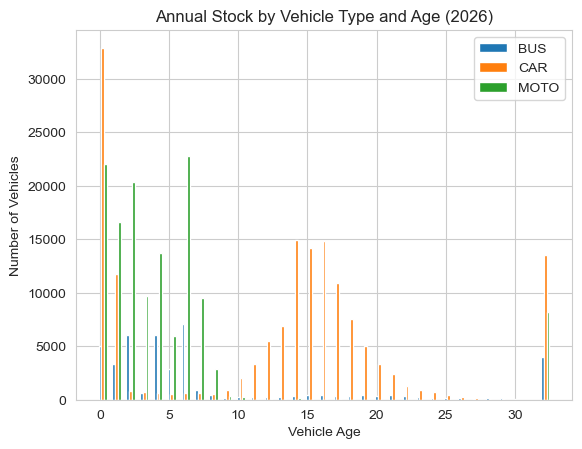

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [18]:
plot_stock_by_age(annual_stock, year=2026)

In [19]:
# plot stock data - cumulative annual stock

def plot_cumulative_stock(stock_dict, years, vehicles=['BUS', 'CAR', 'MOTO']): #, 'MINIBUS', 'VAN', 'TRUCK']):
    
    plot_dict = {}
    for vehicle in vehicles:
        plot_dict[vehicle] = {}
        for year in years:
            plot_dict[vehicle][year] = sum(stock_dict[year][vehicle].values())
    
    sns.set_style('whitegrid')
                
    fig, ax = plt.subplots()
    for vehicle in vehicles:
        ax.plot(years, plot_dict[vehicle].values(), label=vehicle)
    
    ax.set_ylabel('Stock')
    plt.legend()
    
    plt.show()
    plt.savefig('annual_stock.png')
    return plt.gcf()

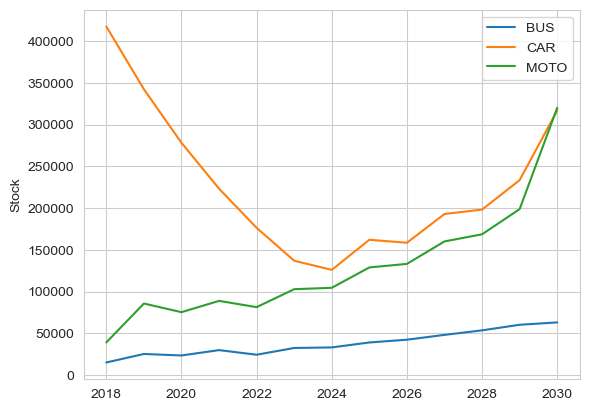

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [20]:
plot_cumulative_stock(annual_stock, range(2018,2031))

## Technology disaggregation of stock

- Use variable new_stock to set overall demand for 'new' vehicles. *Note that these are subject to an age profile themselves.*

In [21]:
year = 2024
mode = 'CAR'

new_veh = new_stock[year][mode]
new_veh

{0: 18.094397430398878,
 1: 258.0832475598998,
 2: 112.37573140984567,
 3: 158.08789333927436,
 4: 114.28040482357183,
 5: 92.37666056572058,
 6: 143.80284273632788,
 7: 99.99535422062539,
 8: 104.75703775494088,
 9: 129.5177921333814,
 10: 263.7972678010783,
 11: 693.301122596336,
 12: 888.5301475032712,
 13: 876.149770314051,
 14: 1190.4208835788736,
 15: 1001.8582156199799,
 16: 1577.0695865652917,
 17: 819.9619046091282,
 18: 848.5320058150211,
 19: 382.8393561589658,
 20: 430.45619150212076,
 21: 179.0393008902626,
 22: 164.75425028731604,
 23: 73.3299264284586,
 24: 95.23367068630989,
 25: 56.187865704922835,
 26: 80.9486200833634,
 27: 36.18879486079775,
 28: 17.142060723535774,
 29: 3.809346827452395,
 30: 7.61869365490479,
 31: 5.714020241178593}

In [22]:
annual_stock

{2018: {'BUS': {0: 6.0,
   1: 0.0,
   2: 6.0,
   3: 20.0,
   4: 17.0,
   5: 124.0,
   6: 240.0,
   7: 1117.0,
   8: 1215.0,
   9: 1606.0,
   10: 1508.0,
   11: 1334.0,
   12: 1195.0,
   13: 1022.0,
   14: 1117.0,
   15: 749.0,
   16: 778.0,
   17: 859.0,
   18: 518.0,
   19: 428.0,
   20: 289.0,
   21: 258.0,
   22: 133.0,
   23: 95.0,
   24: 84.0,
   25: 84.0,
   26: 61.0,
   27: 35.0,
   28: 14.0,
   29: 14.0,
   30: 20.0,
   31: 9.0,
   32: 0.0},
  'CAR': {0: 162.0,
   1: 0.0,
   2: 162.0,
   3: 566.0,
   4: 485.0,
   5: 3475.0,
   6: 6707.0,
   7: 31192.0,
   8: 33940.0,
   9: 44849.0,
   10: 42101.0,
   11: 37253.0,
   12: 33374.0,
   13: 28525.0,
   14: 31192.0,
   15: 20929.0,
   16: 21738.0,
   17: 24000.0,
   18: 14465.0,
   19: 11960.0,
   20: 8081.0,
   21: 7192.0,
   22: 3717.0,
   23: 2667.0,
   24: 2343.0,
   25: 2343.0,
   26: 1697.0,
   27: 970.0,
   28: 404.0,
   29: 404.0,
   30: 566.0,
   31: 242.0,
   32: 0.0},
  'MOTO': {0: 15.0,
   1: 0.0,
   2: 15.0,
   3: 53.0,


In [23]:
desired_stock[2018]['CAR']

65398.29735481909

In [24]:
sum(base_year_stock[2018]['CAR'].values())

417701.0